In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("data/heart_disease_risk.csv.csv")
df.head()

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
0,74.000000,155.0,434.638361,No,No,1.000000
1,125.984818,123.0,219.000000,No,Yes,0.000000
2,125.984818,99.0,220.000000,No,No,1.000000
3,60.000000,162.0,157.000000,Yes,Yes,NaN
4,31.000000,127.0,258.000000,No,No,3.006974


In [100]:
df.info

<bound method DataFrame.info of             Age  RestingBP  Cholesterol FastingBS>120 ExerciseAngina  \
0     74.000000      155.0   434.638361            No             No   
1    125.984818      123.0   219.000000            No            Yes   
2    125.984818       99.0   220.000000            No             No   
3     60.000000      162.0   157.000000           Yes            Yes   
4     31.000000      127.0   258.000000            No             No   
..          ...        ...          ...           ...            ...   
195   52.000000      170.0   241.000000           Yes            Yes   
196   69.000000       98.0   257.000000           Yes             No   
197   41.000000      133.0   253.000000           Yes             No   
198   56.000000      150.0          NaN           Yes             No   
199   37.000000      109.0   217.000000            No             No   

     HeartDisease  
0        1.000000  
1        0.000000  
2        1.000000  
3             NaN  
4  

In [101]:
df.describe(include='all')

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
count,180.000000,182.000000,180.000000,200,200,182.000000
unique,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,No,No,NaN
freq,NaN,NaN,NaN,100,111,NaN
mean,58.010268,140.828300,234.813242,NaN,NaN,0.626757
std,21.679140,39.489199,63.669822,NaN,NaN,0.754086
min,30.000000,90.000000,151.000000,NaN,NaN,0.000000
25%,42.000000,112.000000,190.000000,NaN,NaN,0.000000
50%,53.000000,136.000000,229.000000,NaN,NaN,1.000000
75%,69.000000,159.250000,265.000000,NaN,NaN,1.000000


In [102]:
# Check for missing values and inconsistent values
df.isnull().sum()

Age               20
RestingBP         18
Cholesterol       20
FastingBS>120      0
ExerciseAngina     0
HeartDisease      18
dtype: int64

In [103]:
# Impute Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
# Remove rows with missing or inappropriate values
df = df.dropna()
df = df[df['HeartDisease'].isin([0,1])]
df.head()

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
0,74.000000,155.0,434.638361,No,No,1.0
1,125.984818,123.0,219.000000,No,Yes,0.0
2,125.984818,99.0,220.000000,No,No,1.0
6,125.984818,167.0,228.000000,No,No,1.0
7,58.010268,148.0,250.000000,No,No,0.0


In [104]:
# Convert binary/categorical columns to numeric (if required)
bin_map = {'Yes':1, 'No':0}
if df['FastingBS>120'].dtype == 'object':
    df['FastingBS>120'] = df['FastingBS>120'].map(bin_map)
if df['ExerciseAngina'].dtype == 'object':
    df['ExerciseAngina'] = df['ExerciseAngina'].map(bin_map)
df

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
0,74.000000,155.0,434.638361,0,0,1.0
1,125.984818,123.0,219.000000,0,1,0.0
2,125.984818,99.0,220.000000,0,0,1.0
6,125.984818,167.0,228.000000,0,0,1.0
7,58.010268,148.0,250.000000,0,0,0.0
...,...,...,...,...,...,...
194,47.000000,91.0,270.000000,1,1,1.0
195,52.000000,170.0,241.000000,1,1,0.0
196,69.000000,98.0,257.000000,1,0,0.0
197,41.000000,133.0,253.000000,1,0,0.0


In [105]:
df.isnull().sum()

Age               0
RestingBP         0
Cholesterol       0
FastingBS>120     0
ExerciseAngina    0
HeartDisease      0
dtype: int64

In [106]:
# Exploratory Data Analysis (EDA)
## Summary statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,58.787357,140.670925,236.338619,0.432624,0.446809,0.489362
std,22.241051,39.640229,66.411091,0.497206,0.498935,0.501669
min,30.000000,90.000000,151.000000,0.000000,0.000000,0.000000
25%,42.000000,112.000000,190.000000,0.000000,0.000000,0.000000
50%,56.000000,137.000000,229.000000,0.000000,0.000000,0.000000
75%,69.000000,157.000000,267.000000,1.000000,1.000000,1.000000
max,125.984818,265.075054,434.638361,1.000000,1.000000,1.000000


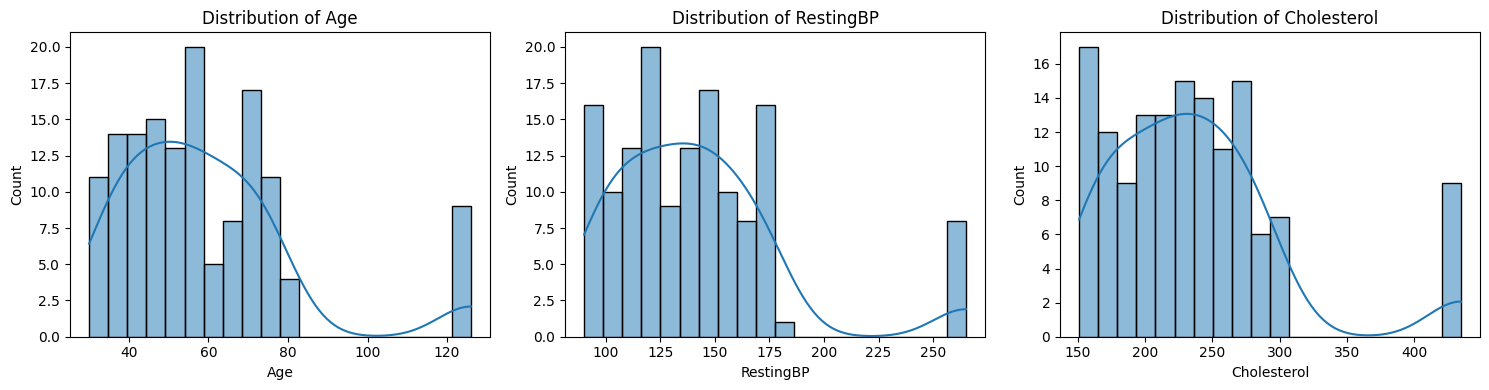

In [107]:
## Histograms
plt.figure(figsize=(15,4))
for idx, col in enumerate(['Age', 'RestingBP', 'Cholesterol']):
    plt.subplot(1,3,idx+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

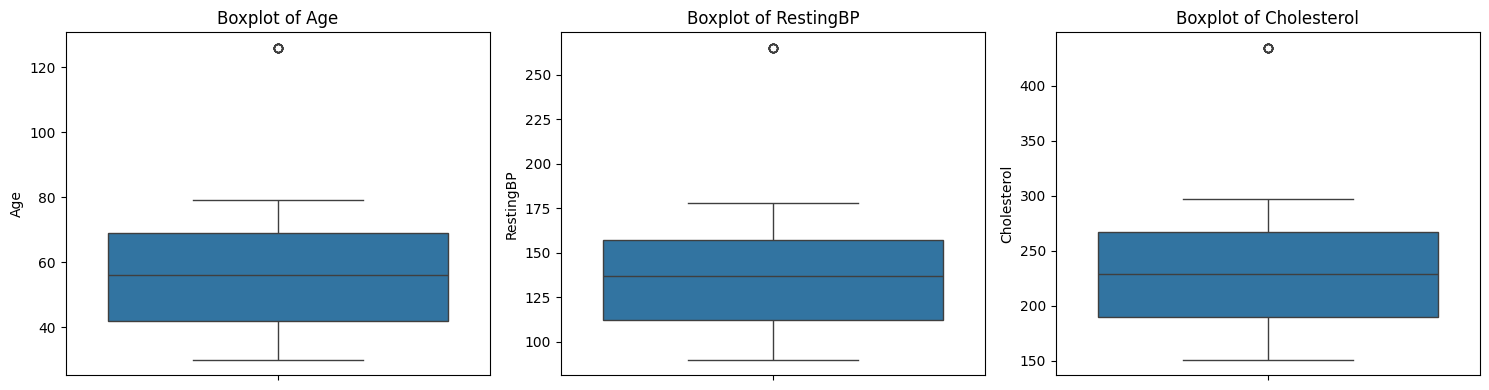

In [108]:
## Boxplots
plt.figure(figsize=(15,4))
for idx, col in enumerate(['Age', 'RestingBP', 'Cholesterol']):
    plt.subplot(1,3,idx+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

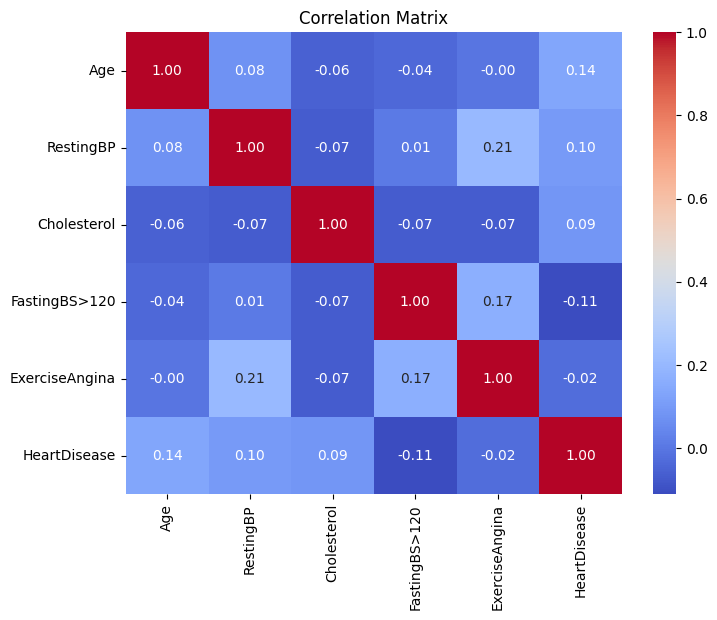

In [124]:
## Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [110]:
# Prepare Data for Modeling
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS>120', 'ExerciseAngina']
X = df[features]
y = df['HeartDisease']

In [111]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [112]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:,1]

In [113]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

In [114]:
# Model Evaluation Function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f'--- {model_name} ---')
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred))
    print('Recall:', recall_score(y_true, y_pred))
    print('F1 Score:', f1_score(y_true, y_pred))
    print('ROC-AUC:', roc_auc_score(y_true, y_prob))
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print()

In [115]:
# Results for Logistic Regression
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

--- Logistic Regression ---
Accuracy:  0.4722222222222222
Precision: 0.4444444444444444
Recall: 0.2222222222222222
F1 Score: 0.2962962962962963
ROC-AUC: 0.6049382716049383
Confusion Matrix:
 [[13  5]
 [14  4]]



In [116]:
# Results for Decision Tree
evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

--- Decision Tree ---
Accuracy:  0.5277777777777778
Precision: 0.5384615384615384
Recall: 0.3888888888888889
F1 Score: 0.45161290322580644
ROC-AUC: 0.5277777777777778
Confusion Matrix:
 [[12  6]
 [11  7]]



In [117]:
# Feature Importance
## Logistic Regression Coefficients
importance_lr = pd.Series(np.abs(logreg.coef_[0]), index=features).sort_values(ascending=False)
print("Logistic Regression feature importance:\n", importance_lr)

Logistic Regression feature importance:
 FastingBS>120     0.299294
ExerciseAngina    0.080706
Age               0.013924
RestingBP         0.005188
Cholesterol       0.004321
dtype: float64


In [118]:
## Decision Tree Feature Importances
importance_dt = pd.Series(dt.feature_importances_, index=features).sort_values(ascending=False)
print("Decision Tree feature importance:\n", importance_dt)

Decision Tree feature importance:
 RestingBP         0.385016
Age               0.252030
Cholesterol       0.244371
ExerciseAngina    0.081727
FastingBS>120     0.036855
dtype: float64


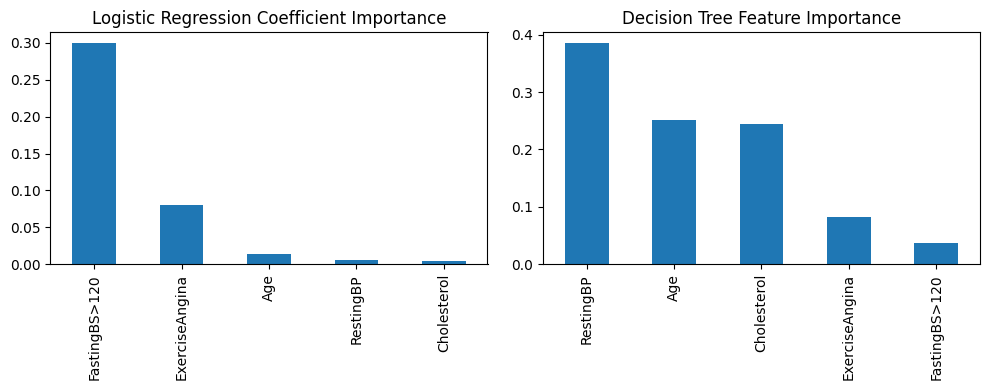

In [122]:
# Plotting feature importances
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
importance_lr.plot(kind='bar')
plt.title('Logistic Regression Coefficient Importance')
plt.subplot(1,2,2)
importance_dt.plot(kind='bar')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

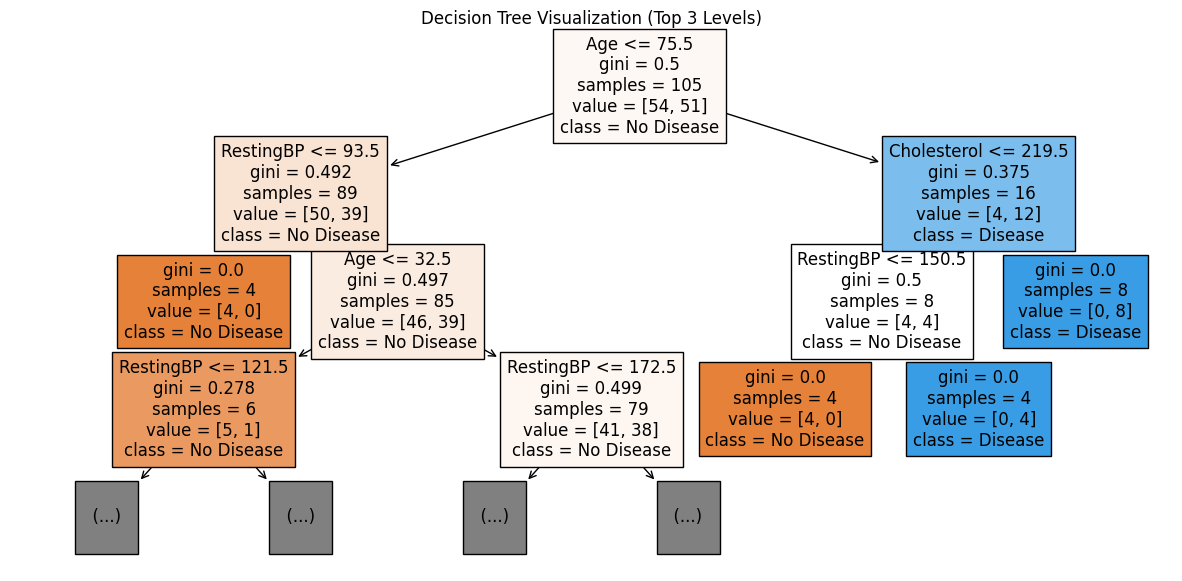

In [123]:
# Visualize Decision Tree
plt.figure(figsize=(15,7))
plot_tree(dt, feature_names=features, class_names=['No Disease', 'Disease'], filled=True, max_depth=3)
plt.title('Decision Tree Visualization (Top 3 Levels)')
plt.show()